In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#warnings.filterwarnings('ignore')

## **Общая информация**

**Описание данных:**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

In [7]:
try:
    df = pd.read_csv('D:/datasets/real_estate_data.csv', sep='\t') 

except FileNotFoundError:
    print("File not found.")
except pd.errors.EmptyDataError:
    print("No data")
except pd.errors.ParserError:
    print("Parse error")
except Exception:
    print("Some other exception")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## **Предобработка данных:**

**Определите и изучите пропущенные значения:**
- Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
**Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.**
- Укажите причины, которые могли привести к пропускам в данных.
- Приведите данные к нужным типам:
- Поясните, в каких столбцах нужно изменить тип данных и почему.

In [5]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Начнем со столбца `is_apartment`. Заменим значение Nan на False.**

In [7]:
df['is_apartment'].unique()
df['is_apartment'].fillna(False, inplace=True)

**Переименуем столбец `cityCenters_nearest`**

In [8]:
df.rename(columns = {'cityCenters_nearest':'citycenters_nearest'}, inplace=True)

**У столбцов `floors_total` & `locality_name` удалим строки с пропущенным значением.**

In [9]:
df.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

**Заменим пропуски в столбцах `balcony`, `parks_around3000`, `ponds_around3000` на 0, т.к. данные были пропущены не спроста, а заодно изменим тип данных на int.**

In [10]:
df['balcony'] = df['balcony'].fillna(0).astype('Int64')
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('Int64')

In [11]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

**`сeling_heigt`, `living_area`, `kitchen_area` - заполним медианным значением к значениям столбцов, высота потолка к кол-ву комнат, площадь жилой зоны от общей, и площадь кухни от общей, значения, к которым не смог примениться метод, удаляем.**

In [12]:
df["ceiling_height"] = df.groupby("rooms")["ceiling_height"].transform(lambda x: x.fillna(x.median()))
df['ceiling_height'] = df['ceiling_height'].fillna(-1)
df = df[df['ceiling_height'] != -1]

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
df["living_area"] = df.groupby("total_area")["living_area"].transform(lambda x: x.fillna(x.median()))
df['living_area'] = df['living_area'].fillna(-1)
df = df[df['living_area'] != -1]

In [14]:
df["kitchen_area"] = df.groupby("total_area")["kitchen_area"].transform(lambda x: x.fillna(x.median()))
df['kitchen_area'] = df['kitchen_area'].fillna(-1)
df = df[df['kitchen_area'] != -1]

In [15]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5423
citycenters_nearest      5400
parks_around3000            0
parks_nearest           15335
ponds_around3000            0
ponds_nearest           14370
days_exposition             0
dtype: int64

**Заменим значения стобцов `airports_nearest`, `parks_nearest`, `ponds_nearest`,`citycenters_nearest` на `-1`, данные могут еще пригодиться.**

In [16]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)
df['parks_nearest'] = df['parks_nearest'].fillna(-1)
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)
df['cityCenters_nearest'] = df['citycenters_nearest'].fillna(-1)

In [17]:
df.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
citycenters_nearest     5400
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
cityCenters_nearest        0
dtype: int64

## **Посчитайте и добавьте в таблицу:**

### Цену квадратного метра

In [18]:
df['price_m2'] = (df['last_price'] / df['total_area']).astype(int)

### День недели, месяц и год публикации объявления

In [19]:
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

### Этаж квартиры; варианты — первый, последний, другой

In [20]:
def floor_f(value):
    current_floor = value['floor']
    if value['floor'] == 1:
        return 'первый'
    elif value['floor'] == value['floors_total']:
        return 'последний'
    else: 
        return 'другой'
    
df['floor_lvl'] = df.apply(floor_f, axis = 1)

### Cоотношение жилой и общей площади, а также отношение площади кухни к общей.

In [21]:
df['relation_living'] = df['living_area'] / df['total_area']

In [22]:
df['relation_kitchen'] = df['kitchen_area'] / df['total_area']

## **Проведите исследовательский анализ данных и выполните инструкции**

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

- **Построим гистограмму площади.**

count    23289.000000
mean        60.149299
std         34.280860
min         14.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

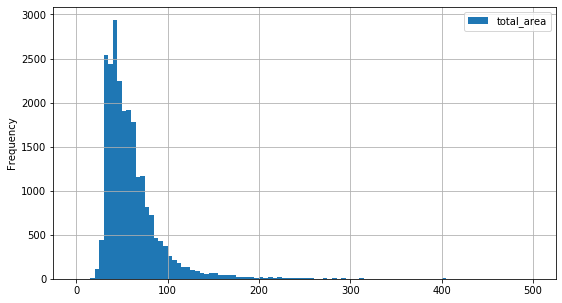

In [23]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0,500))
df['total_area'].describe()

**Данные распределены в пределах нормы. Также мы получули методом `describe` представление о значениях данной гистограммы, в которой можно заметить о наличии позиции с 900м2, в данных оставим значения в пределах двух межквартильных размахов (IQR).**

(0, 200)

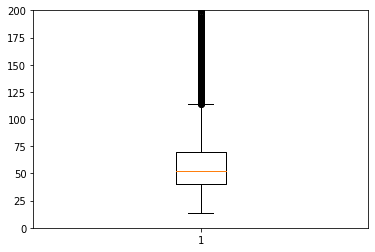

In [24]:
plt.boxplot(df['total_area'])
plt.ylim(0,200)

**После 115м2 происходят выбросы, извабимся от них!**

In [25]:
df = df.query('total_area > 0 and total_area <= 115')

- **Построим гистограмму стоимости жилья.**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    22128.000000
mean         5.322581
std          3.408572
min          0.012190
25%          3.393114
50%          4.500000
75%          6.300000
max         82.000000
Name: price, dtype: float64

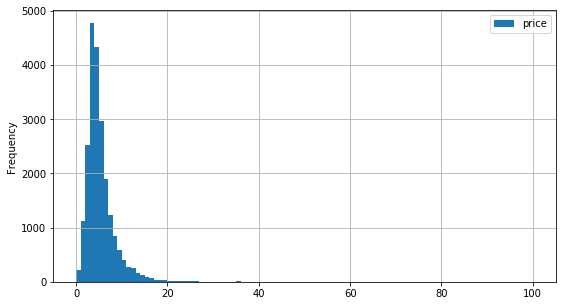

In [26]:
df['price'] = df['last_price'] / 1000000
df.plot(y = 'price', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 100))
df['price'].describe()

**Из гистограммы видим нормальное распределение данных, построим график для анализа медианы, среднего, нижнего и верхнего квартиля, минимального и максимального значения, выборки и выбросы.**
**Для комфортного продолжения работы избавимся от выбросов.**

(0, 20)

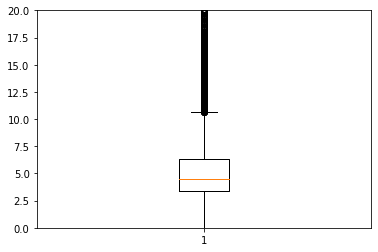

In [27]:
plt.boxplot(df['price'])
plt.ylim(0,20)

In [28]:
df = df.query('price > 0 and price <= 10.650')

- **Далее строим гистограмму для просмотра данных в столбце `rooms`**

'Кол-во комнат:'

array([1, 2, 3, 4, 0, 5, 6])

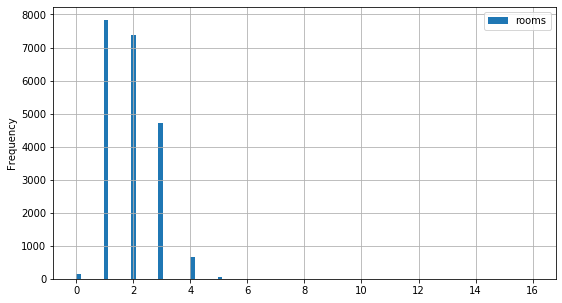

In [29]:
df.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 16))
df['rooms'].describe()
display('Кол-во комнат:', df['rooms'].unique())

**Данные состоят из квартир с 1, 2 и 3 комнатами. Есть небольшая доля 4-комнатных квартир. Квартиры с 0 комнат являются апартаментами**

- **Гистограмма столбца `ceiling_height`:**

count    20777.000000
mean         2.688204
std          0.798091
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

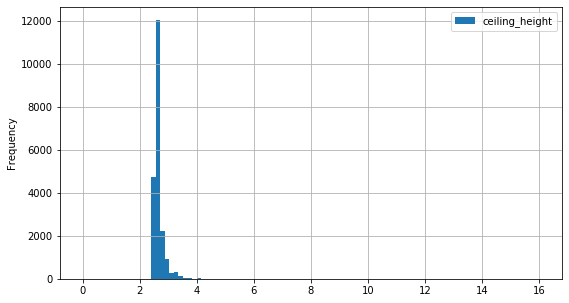

In [30]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 16))
df['ceiling_height'].describe()

**Допустим, что некоторые данные были внесены по ошибке, исправим эти значения и отфильтруем данные от 1.8м до 3.2м**

**(Данные можно было сразу отбросить)**

In [31]:
df.loc[df['ceiling_height'] == 32.00, 'ceiling_height'] = 3.2
df.loc[df['ceiling_height'] == 27.50, 'ceiling_height'] = 2.7
df.loc[df['ceiling_height'] == 27.00, 'ceiling_height'] = 2.7
df.loc[df['ceiling_height'] == 26.00, 'ceiling_height'] = 2.6
df.loc[df['ceiling_height'] == 25.00, 'ceiling_height'] = 2.5
df.loc[df['ceiling_height'] == 24.00, 'ceiling_height'] = 2.4
df.loc[df['ceiling_height'] == 22.60, 'ceiling_height'] = 2.6
df.loc[df['ceiling_height'] == 20.00, 'ceiling_height'] = 2.0
df = df.query('ceiling_height > 1.80 and ceiling_height <= 3.20')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20410.000000
mean       149.977413
std        202.622620
min          0.000000
25%         24.000000
50%         70.000000
75%        190.000000
max       1580.000000
Name: days_exposition, dtype: float64

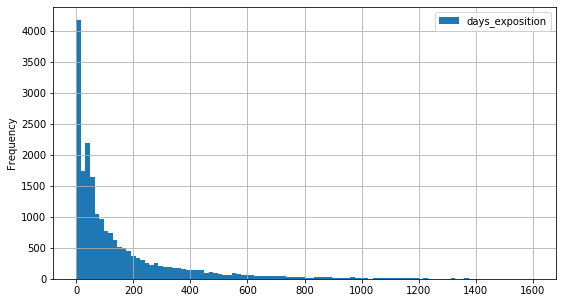

In [32]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 1600))
df['days_exposition'].describe()

(-50, 600)

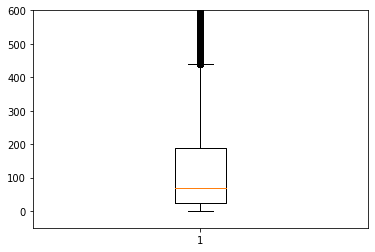

In [33]:
plt.boxplot(df['days_exposition'])
plt.ylim(-50,600)

**Большая часть значений находится в диапазоне до 200 дней.**

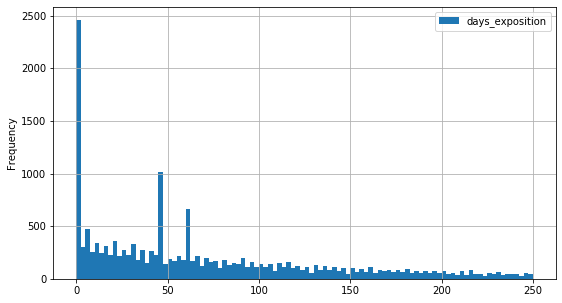

In [34]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 250))

- **Сделка прошла быстро, если продажа состоялась в срок до 22 дней после подачи объявления, а если сделка состоялась через 199 и больше дней - она длилась долго.**

- **Разница среднего(70) и медианы(148) больше в 2 раза.**

- Значит, что **в распределении  хвост высоких значений, сильно влияет на среднее (третий квартиль у нас заканчивается на значении 199, а максимальное значение - целых 1580 дней).** Как видим по графикам, нормальные значения находятся в промежутке от 0 до 465.

- Уберем из таблицы редкие и выбивающиеся значения.

In [35]:
df = df.query('days_exposition > 0 and days_exposition <= 465')

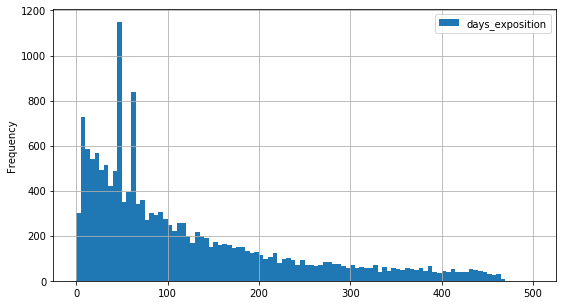

In [36]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 500))

**Выделяются значения на 45,60,90 дней. Возможно, данные объявления были автоматически сняты с продажи, отчистим эти данные:**

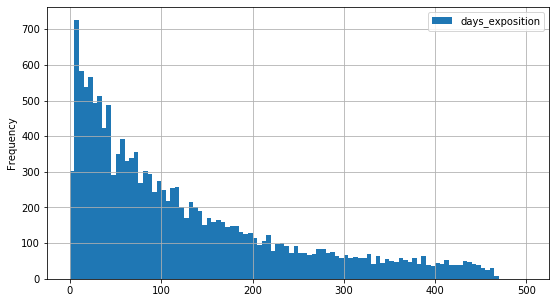

In [37]:
df = df.query('days_exposition != 45  and days_exposition != 60 and days_exposition != 90')
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 500))

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

- **Изучим зависимость цены  от общей площади квартиры.**

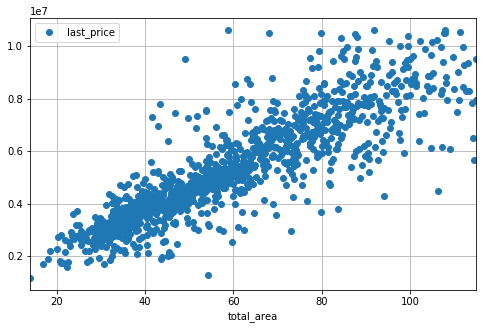

total_area    1.000000
last_price    0.681478
Name: total_area, dtype: float64

In [55]:
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(8, 5))
)
plt.show()
df[['total_area', 'last_price']].corr()['total_area']

**Заметна значительная корреляция, по которой видно, увеличение площади квартиры заметно увеличивает ее стоимость!**

- Изучим зависимость кол-во комнат на стоимость квартиры.

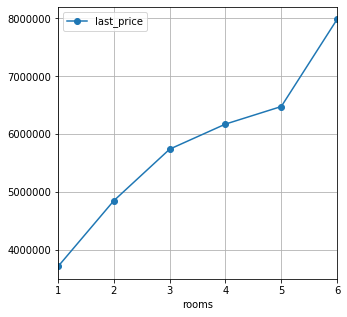

,last_price,rooms
last_price,1.000000,0.703155
rooms,0.703155,1.000000


In [39]:
(
    df.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
display(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr())

**Количество комнат влияет на цену, чем больше комнат, тем больше цена.Но стоит отметить, что зависимость не так высока, по сравнению с площадью квартиры.**

- Изучим зависимость этажа квартиры на ее стоимость.

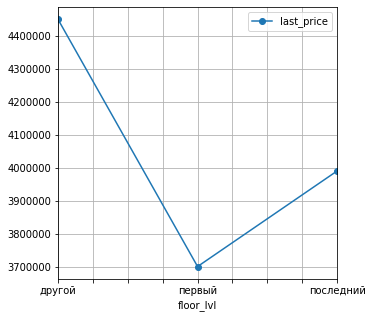

In [40]:
(
    df.pivot_table(index='floor_lvl', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

**Из-за особенной эксплуатации квартир, мы видим очевдную низкую стоимость жилья на 1 этаже, и существенно высокую стоимость этажей, находящихся не на 'первом-последнем'.**

- Расмотрим зависимость удаленности квартиры от центра и ее стоимости.

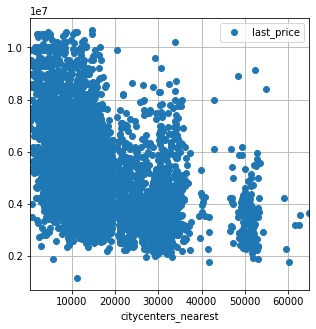

,citycenters_nearest,last_price
citycenters_nearest,1.000000,0.594362
last_price,0.594362,1.000000


In [41]:
(
    df.pivot_table(index='citycenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
display(df.pivot_table(index='floor', values=['citycenters_nearest', 'last_price']).corr())

**Очевидная зависимость стоимости квартиры от близости к центру. Чем ближе к центру, тем выше стоимость.**

- **Оценим зависимость от даты размещения:**

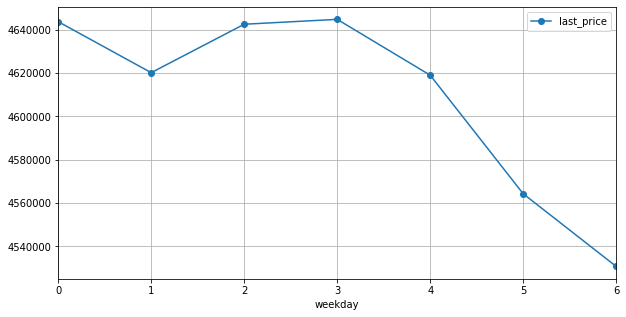

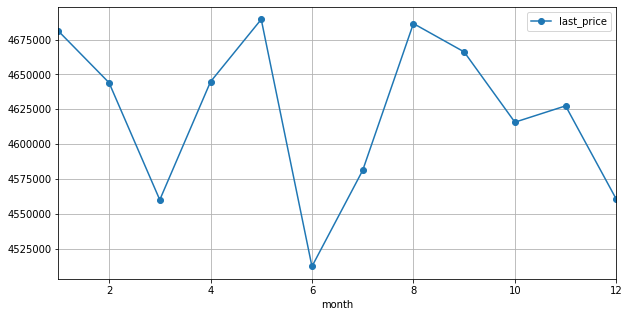

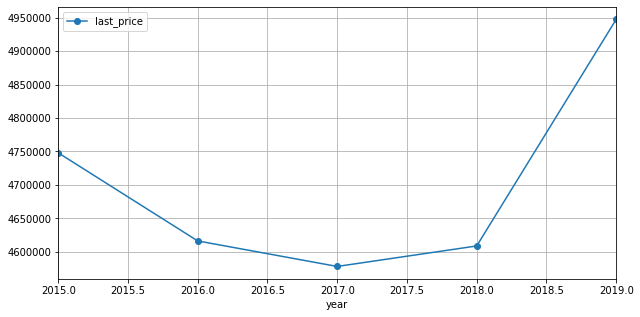

In [42]:
# Зависимость от дня размещения
(
    df.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    df.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    df.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

**Вне зависимости от дня недели, месяца или года, средняя стоимость квартиры держалась на одном уровне. Стоит только отметить начало подорожания жилья с начала 2018 года.**


### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [43]:
locality_pivot = df.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc=['count', 'mean'])
locality_pivot.columns = ['count', 'mean']
locality_pivot = locality_pivot.sort_values('count', ascending = False)
locality_pivot.head(10)

,count,mean
locality_name,,
Санкт-Петербург,9667,103553.432709
посёлок Мурино,408,85507.598039
посёлок Шушары,342,77962.991228
Всеволожск,265,66320.083019
Колпино,251,74790.366534
посёлок Парголово,246,89479.914634
Пушкин,234,99284.705128
деревня Кудрово,221,92105.710407
Гатчина,215,67816.311628


In [44]:
display(locality_pivot.query('locality_name == "Санкт-Петербург"'))

,count,mean
locality_name,,
Санкт-Петербург,9667,103553.432709


In [45]:
display(locality_pivot.query('locality_name == "Выборг"'))

,count,mean
locality_name,,
Выборг,155,56801.2


### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

- **Построим график для квартир Санкт-Петербурга и определим границу центральной зоны:**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14958 entries, 1 to 23693
Data columns (total 31 columns):
total_images            14958 non-null int64
last_price              14958 non-null float64
total_area              14958 non-null float64
first_day_exposition    14958 non-null object
rooms                   14958 non-null int64
ceiling_height          14958 non-null float64
floors_total            14958 non-null float64
living_area             14958 non-null float64
floor                   14958 non-null int64
is_apartment            14958 non-null bool
studio                  14958 non-null bool
open_plan               14958 non-null bool
kitchen_area            14958 non-null float64
balcony                 14958 non-null Int64
locality_name           14958 non-null object
airports_nearest        14958 non-null float64
citycenters_nearest     11405 non-null float64
parks_around3000        14958 non-null Int64
parks_nearest           14958 non-null float64
ponds_around3000   

In [47]:
df['citycenters_nearest'] = df['citycenters_nearest'].fillna(0) 
df['centre'] = df['citycenters_nearest'] / 1000
df['centre'] = df['centre'].astype('int')

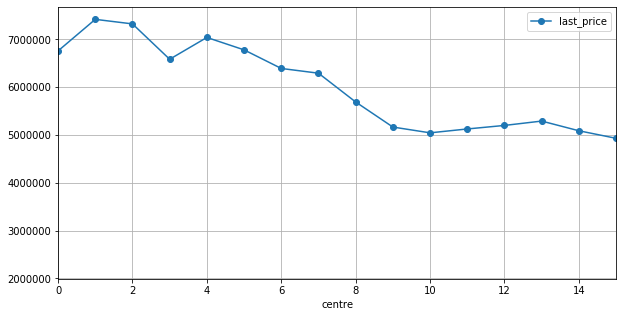

In [48]:
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='centre', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)


- **Медианной графика является 7км. Значит центральной зоной Санкт-Петербурга является 7 км, т. к. после заметен спад в цене!**

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

- **Создадим датасет с двумя фильтрами: город - Санкт-Петербург, центр зоны - 7 км:**

In [49]:
centre_p = df.query('locality_name == "Санкт-Петербург" and centre <= 7')

count    1364.000000
mean       60.311796
std        19.325597
min        17.000000
25%        45.000000
50%        58.200000
75%        73.000000
max       115.000000
Name: total_area, dtype: float64

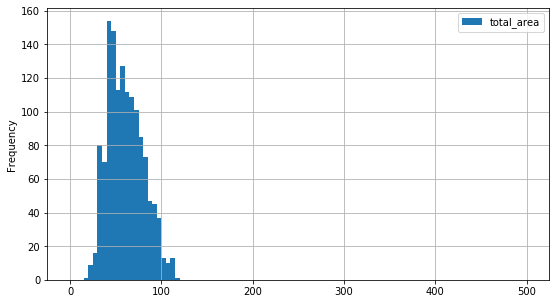

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    1364.000000
mean        6.739803
std         1.862912
min         1.600000
25%         5.300000
50%         6.700000
75%         8.100000
max        10.650000
Name: price, dtype: float64

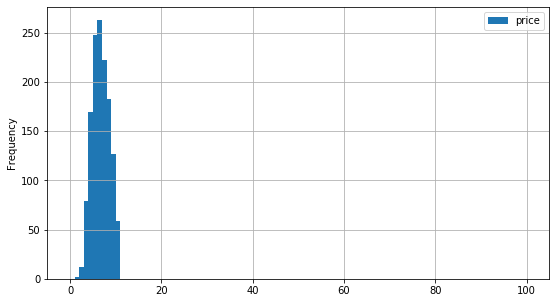

count    1364.00000
mean        2.16129
std         0.91955
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
max         6.00000
Name: rooms, dtype: float64

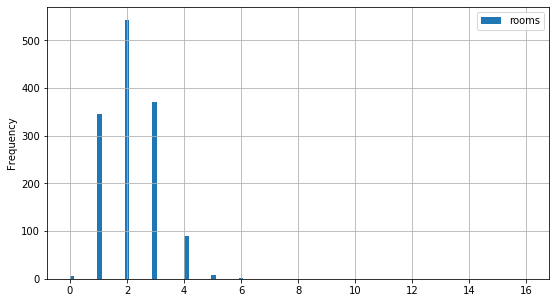

count    1364.000000
mean        2.766290
std         0.202283
min         2.400000
25%         2.600000
50%         2.650000
75%         3.000000
max         3.200000
Name: ceiling_height, dtype: float64

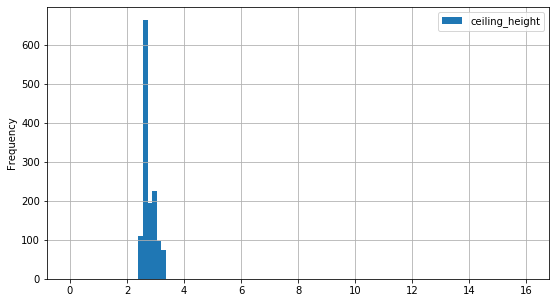

In [50]:
# Изучаем площадь

centre_p.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0,500))
display(centre_p['total_area'].describe())
plt.show()

# Изучаем цену
centre_p['price'] = df['last_price'] / 1000000
centre_p.plot(y = 'price', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 100))
display(centre_p['price'].describe())
plt.show()

# Изучаем число комнат
centre_p.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 16))
display(centre_p['rooms'].describe())
plt.show()

# Изучаем высоту потолков
centre_p.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0, 16))
display(centre_p['ceiling_height'].describe())
plt.show()

В общем заметно, что аномалий в центре Санкт-Петербурга не наблюдается:

- **Посмотрим на влияние числа комнат на стоимость квартир в центре Санкт-Петербурга:**

,last_price,rooms
last_price,1.000000,-0.015142
rooms,-0.015142,1.000000


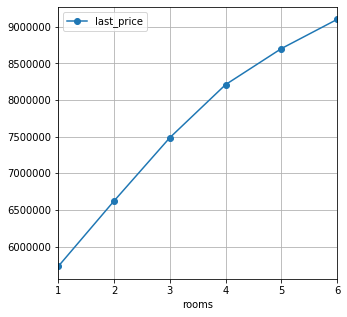

In [51]:
(
    centre_p.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5),)
)
display(centre_p.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr())

**В центре стоимость жилья от колличества комнат планомерна растет. Можно заметить, что минимальная цена прилично выше, нежели в общей выборке.**

- **Посмотрим на влияние этажа на стоимость квартир в центре Санкт-Петербурга:**

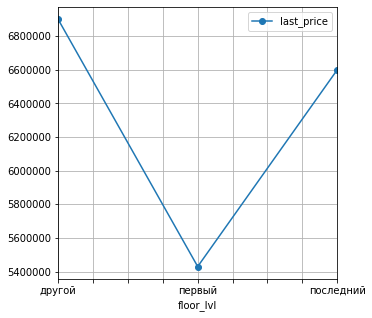

In [52]:
(
    centre_p.pivot_table(index='floor_lvl', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

**Мы также видим очевдную низкую стоимость жилья на 1 этаже, и существенно высокую стоимость этажей, находящихся не на 'первом-последнем', но в центре стоимость последнего этажа значительно выше общей выборки.**

- **Посмотрим на влияние удаленности от центра на стоимость квартир в центре Санкт-Петербурга:**


,citycenters_nearest,last_price
citycenters_nearest,1.000000,0.569949
last_price,0.569949,1.000000


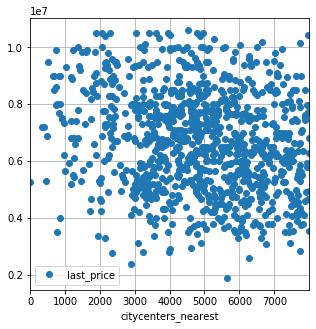

In [53]:
(
    centre_p.pivot_table(index='citycenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
display(centre_p.pivot_table(index='floor', values=['citycenters_nearest', 'last_price']).corr())

**Четкой зависимости нет**

- **Посмотрим на влияние даты размещения на стоимость квартир в центре Санкт-Петербурга:**

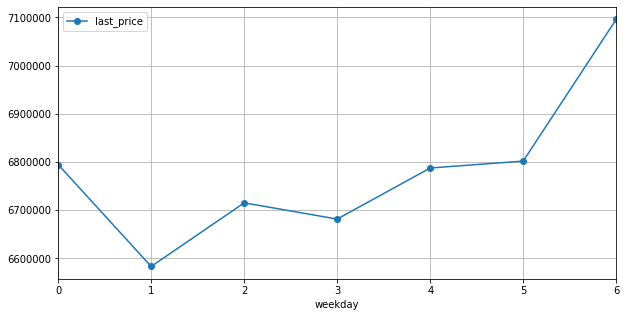

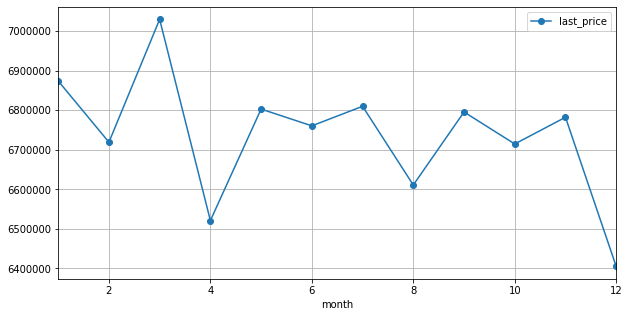

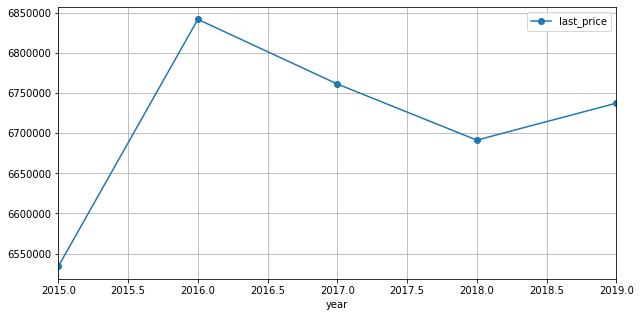

In [54]:
# Зависимость от дня размещения
(
    centre_p.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    centre_p.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    centre_p.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

**Зависимость от дня размещения**
- Видим обратную ситуацию, цена на пике в выходные, чем в будние дни.
**Зависимость от месяца размещения**
- В апреле и в декабре квартиры значительно дешевле, в другие месяцы стоимость держится на уровне.
**Зависимость от года размещения**
- Заметно, что скачек стоимости квартир в центре произошел в 2015 году, после 2016 года, стоимость чуть спала и зафиксировалась.

## **Общий вывод:**

**Время продажи квартиры:**

- Чаще всего квартиру продают за 70 дней. Быстро - 22 дня,а долго - больше 199 дней.
- Присутствует большая часть квартир, проданных очень быстро, но также были и объявления, которые висят по несколько лет.

**Факторы, влияющие на стоимость:**

- На стоимость больше всего влияет отдаленность от центра и площадь квартиры.
- Самая дешевая недвижимость находится на 1 этаже, самая дорогая не находится на первом\последнем этаже.
- Также можно заметить, что в центре Питера квартиры на последнем этаже значительно дороже и популярнее, нежели по общей базе. Это может быть связанно с более манящей архитектурой города.
- Старт подорожания квартир начинается с 2018 года.

**Стоимость квадратного метра в топ-10 населённых пунктов:**
Самый дорогой м2 находится в Санкт-Петербурге - 103553
Самый дешевый м2 находится в Выборге - 11309

**Факторы, влияющие на стоимость в центре Санкт-Петербурга:**

- В центре города нет зависимости удаленности к центру города.
- В целом из-за более дорогого м2 стоимость жилья не так сильно растет от количества комнат, как вне центра.
